# `rev_tortuosity`

In [4]:
# Import Packages
import matplotlib.pyplot as plt

import porespy as ps

ps.visualization.set_mpl_style()

No module named 'pyedt'


## `im`

The image can be 2D or 3D and the tortuosity is computed on the `True` voxels.

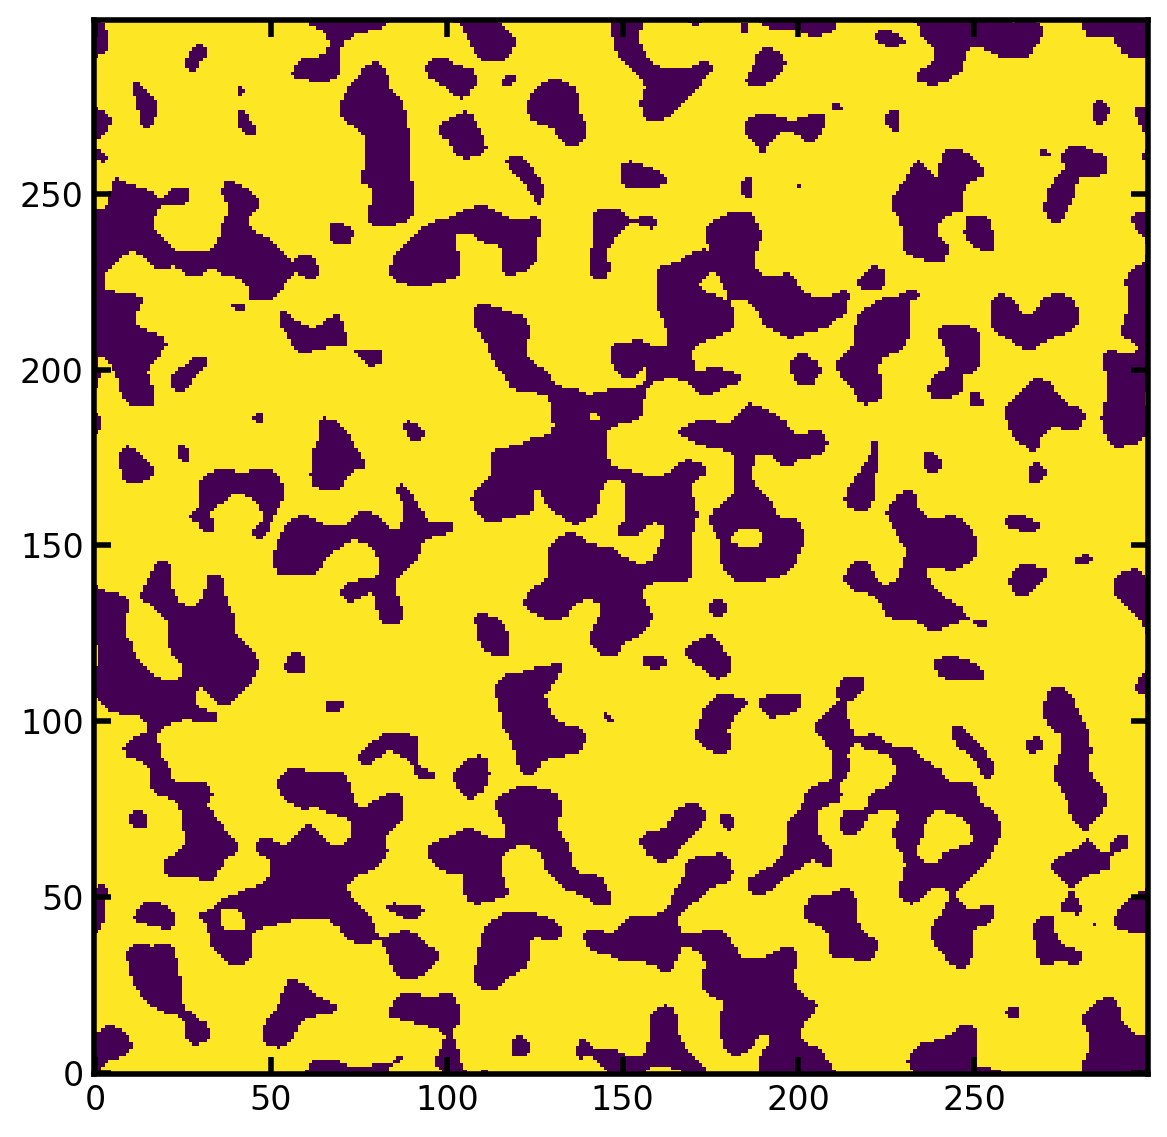

In [11]:
# Generate a Test Image
im = ps.generators.blobs(shape=[300, 300], porosity=0.7, blobiness=2, seed=1)
plt.figure(figsize=[6, 6])
plt.imshow(im, origin='lower')

# Calculate Tortuosity for Different Subdomain Sizes
rev = ps.metrics.rev_tortuosity(im)

The `rev_tortuosity` function returns a `Results` object, which has several named attributes:

In [12]:
print(rev)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of rev_tortuosity generated at Fri May  2 11:24:08 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
porosity_orig             Dictionary with 200 items
porosity_perc             Dictionary with 200 items
g                         Dictionary with 200 items
tau                       Dictionary with 200 items
volume                    Dictionary with 200 items
length                    Dictionary with 200 items
axis                      Dictionary with 200 items
time                      Dictionary with 200 items
slice                     Dictionary with 200 items
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


We can plot these results as follows:

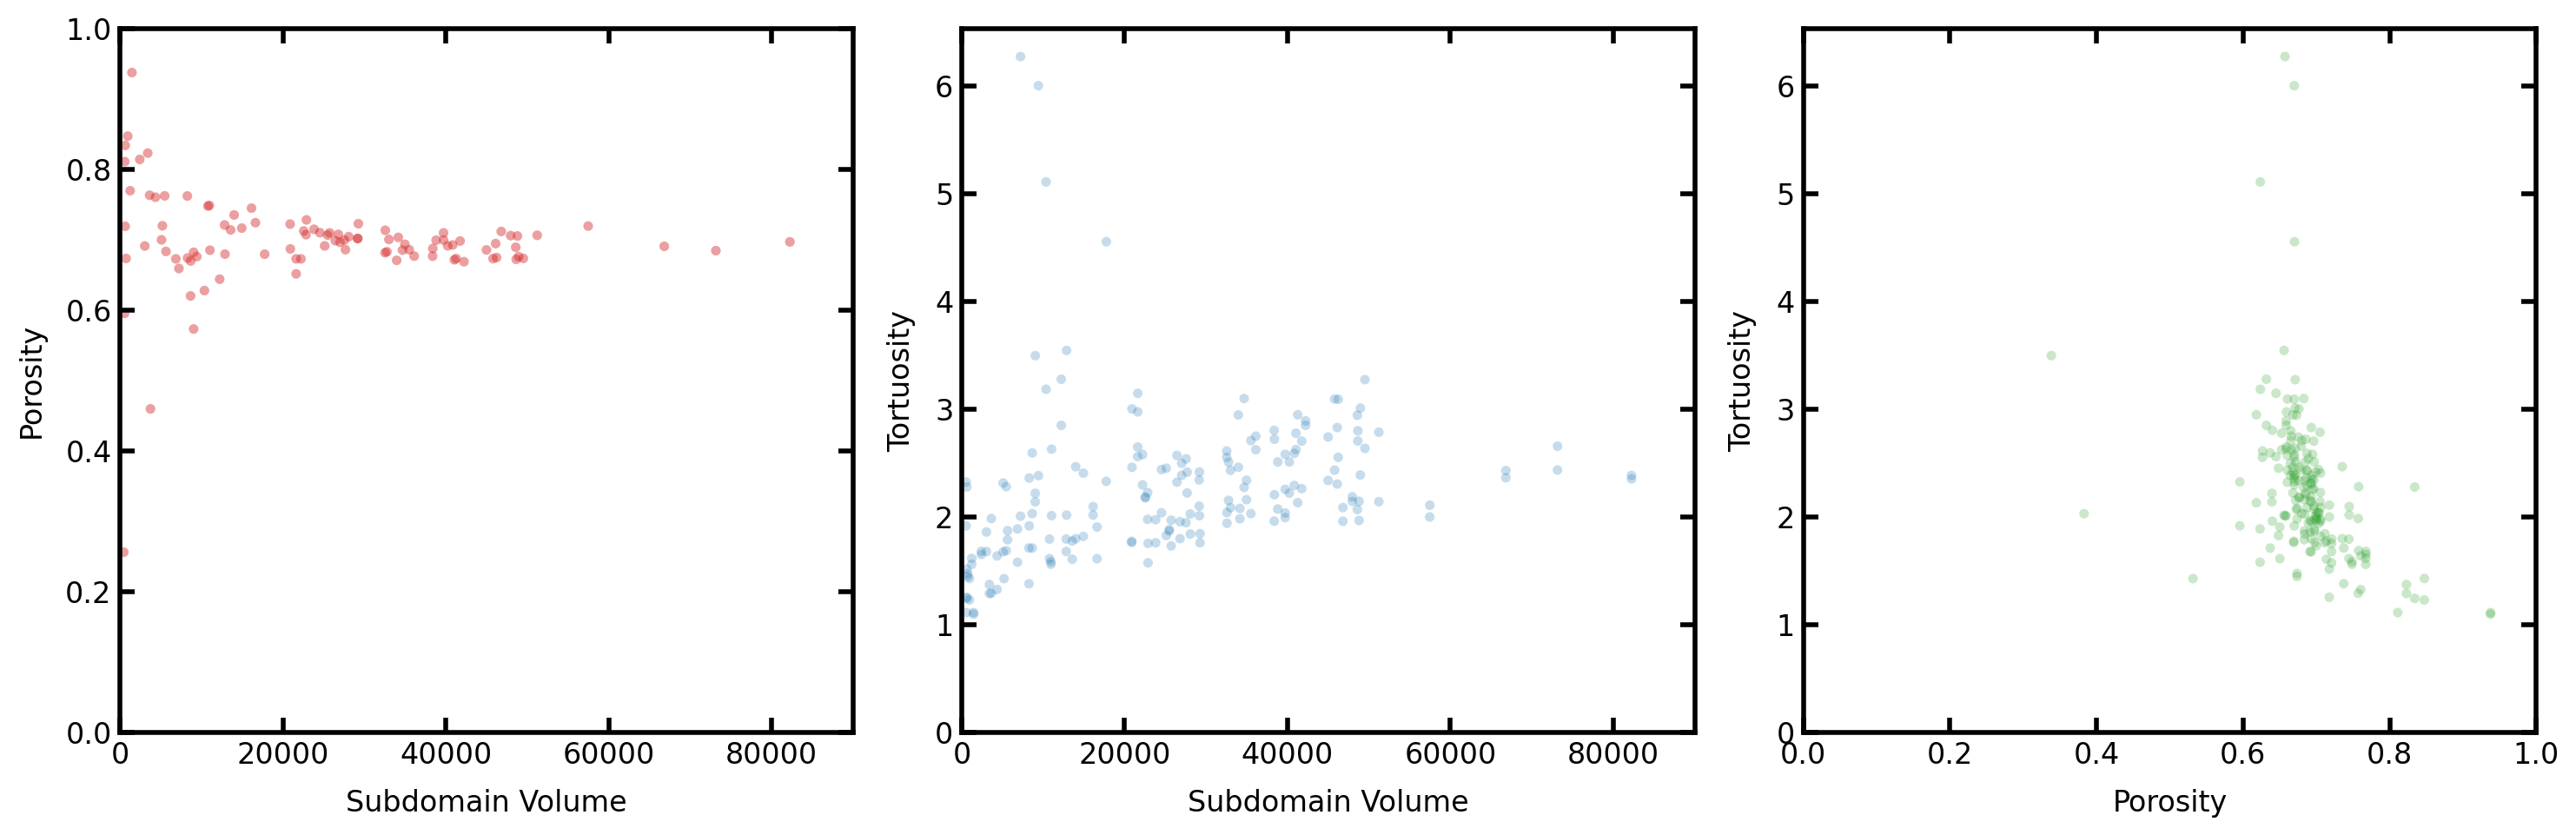

In [10]:
# Visualize the Results
fig, ax = plt.subplots(1, 3, figsize=[15, 5])

# Plot porosity vs volume
ax[0].scatter(rev.volume, rev.porosity_orig, marker='.', alpha=0.25, fc='tab:red', ec='none')
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, im.size])
ax[0].set_ylabel('Porosity')
ax[0].set_xlabel('Subdomain Volume')

# Plot tortuosity vs volume
ax[1].scatter(rev.volume, rev.tau, marker='.', alpha=0.25, fc='tab:blue', ec='none')
ax[1].set_ylim([0, None])
ax[1].set_xlim([0, im.size])
ax[1].set_ylabel('Tortuosity')
ax[1].set_xlabel('Subdomain Volume')

# Plot tortuosity vs porosity
ax[2].scatter(rev.porosity_perc, rev.tau, marker='.', alpha=0.25, fc='tab:green', ec='none')
ax[2].set_xlim([0, 1])
ax[2].set_ylim([0, None])
ax[2].set_xlabel('Porosity')
ax[2].set_ylabel('Tortuosity')

plt.tight_layout();

## `n`

Be default the function will compute the tortuosity of `n` randomly sized blocks selected from random locations throughout the domain.  The default is 100, but more or less can be specified:

In [15]:
rev = ps.metrics.rev_tortuosity(im, n=200)
print(rev)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of rev_tortuosity generated at Fri May  2 11:27:59 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
porosity_orig             Dictionary with 400 items
porosity_perc             Dictionary with 400 items
g                         Dictionary with 400 items
tau                       Dictionary with 400 items
volume                    Dictionary with 400 items
length                    Dictionary with 400 items
axis                      Dictionary with 400 items
time                      Dictionary with 400 items
slice                     Dictionary with 400 items
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


## `slices`

If more control of the subdomains is needed then you can passes a list of `slice` objects direct as `slices`.  There are functions in the `tools` module from computing other slices:

In [21]:
slices = ps.tools.get_slices_multigrid(
    im=im,
    block_size_range=[50, 300, 50],
)
rev = ps.metrics.rev_tortuosity(im, slices=slices)
print(rev)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of rev_tortuosity generated at Fri May  2 11:32:39 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
porosity_orig             Dictionary with 102 items
porosity_perc             Dictionary with 102 items
g                         Dictionary with 102 items
tau                       Dictionary with 102 items
volume                    Dictionary with 102 items
length                    Dictionary with 102 items
axis                      Dictionary with 102 items
time                      Dictionary with 102 items
slice                     Dictionary with 102 items
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


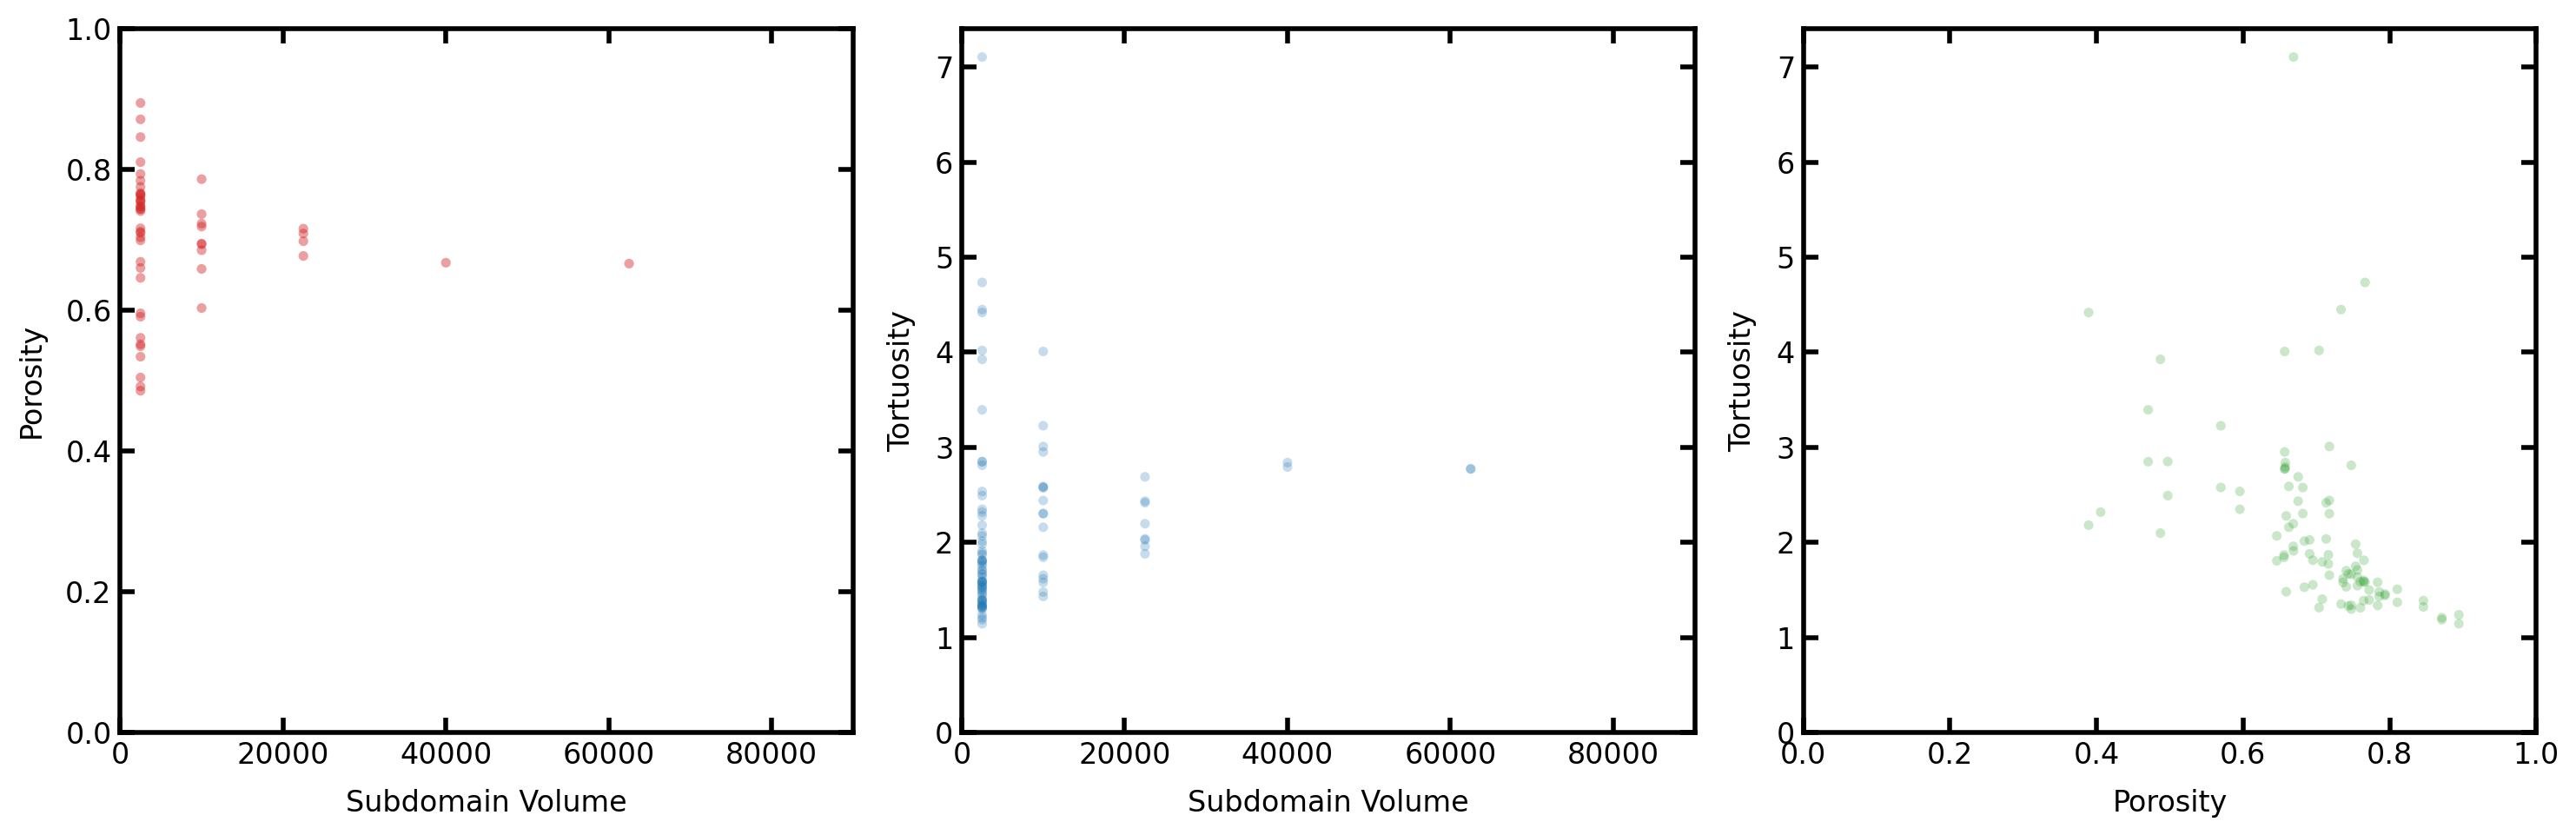

In [22]:
# Visualize the Results
fig, ax = plt.subplots(1, 3, figsize=[15, 5])

# Plot porosity vs volume
ax[0].scatter(rev.volume, rev.porosity_orig, marker='.', alpha=0.25, fc='tab:red', ec='none')
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, im.size])
ax[0].set_ylabel('Porosity')
ax[0].set_xlabel('Subdomain Volume')

# Plot tortuosity vs volume
ax[1].scatter(rev.volume, rev.tau, marker='.', alpha=0.25, fc='tab:blue', ec='none')
ax[1].set_ylim([0, None])
ax[1].set_xlim([0, im.size])
ax[1].set_ylabel('Tortuosity')
ax[1].set_xlabel('Subdomain Volume')

# Plot tortuosity vs porosity
ax[2].scatter(rev.porosity_perc, rev.tau, marker='.', alpha=0.25, fc='tab:green', ec='none')
ax[2].set_xlim([0, 1])
ax[2].set_ylim([0, None])
ax[2].set_xlabel('Porosity')
ax[2].set_ylabel('Tortuosity')

plt.tight_layout();

## `axis`

By default the tortuosity is computed in all directions for each block, but the `axis` can be specified:

In [13]:
rev = ps.metrics.rev_tortuosity(im, axis=1)
print(rev)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of rev_tortuosity generated at Fri May  2 11:25:55 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
porosity_orig             Dictionary with 100 items
porosity_perc             Dictionary with 100 items
g                         Dictionary with 100 items
tau                       Dictionary with 100 items
volume                    Dictionary with 100 items
length                    Dictionary with 100 items
axis                      Dictionary with 100 items
time                      Dictionary with 100 items
slice                     Dictionary with 100 items
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
